# Billboard Hot 100 Lyrics Analysis Through the Decades

In [1]:
import lyricsgenius as lg
import pandas as pd
import numpy as np
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import plotly_express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from urllib.request import Request, urlopen, quote
from bs4 import BeautifulSoup
import requests
from requests.exceptions import Timeout

## Webscraping Function Used to Pull Song Info and Lyrics

Ran once already, and saved out to csv file. Takes approximately 3 hours, starting in 1970, going until 2020.

In [2]:
## Define function to scrape Billboard Top 100 Songs of the Year
## then pull lyric and song information from Genius.com
## utilizing lyricsgenius package, then convert to DataFrame
## I will start in 1970
def GetSongLyrics(start_year, end_year):
    
    ## Define Billboard Top 100 Scrapper
    def getTop100Songs(URL):
        page = requests.get(URL)
        bs = BeautifulSoup(page.text, "lxml")
        rows = bs.find('table').find_all('tr')
        son_art = []
        for row in rows[1:]:
            cols = row.find_all(['td', 'th'])
            cols = [t.text.strip().strip('"') for t in cols]
            data = (cols[1], cols[2])
            son_art.append(data)
        return son_art
    
    ## Define Genius API access token
    token = "1VHE7q4FnW4XcMobQtv2RLtN-hc2ZgWMXm0zOTsIHptb9dOeNzddpuFRm4kT_CcZ"

    ## Creating Genius instance to scrap data
    ## Passed arguments to remove section headers, such as chorus
    ## as well as ignore non-songs and remixes, edits, etc. of songs
    genius = lg.Genius(token, remove_section_headers=True,
                       skip_non_songs=True, excluded_terms=["Remix", "Live", "Edit", "Mix", "Club"])
    
    songs = []
    artists= []
    titles = []
    albums = []
    years = []
    lyrics = []
    
    for y in range(start_year, end_year+1):
        x = str("https://en.m.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_"+str(y))
        
        top100 = getTop100Songs(x)
        
        genius.timeout = 15
#        genius.sleep_time = 40
        
        for i in top100:
            retries = 0
            while retries < 3:
                try:
                    q = genius.search_song(i[0], i[1])
                except Timeout as e:
                    retries += 1
                    continue
                if q is not None:
                    songs.append(q)
                    years.append(y)
                break
    
    for song in songs:
        if song is not None:
            artists.append(song.artist)
            titles.append(song.title)
            albums.append(song.album)
            lyrics.append(song.lyrics)
        
    tracklist = pd.DataFrame({'artist':artists, 'title':titles, 'album':albums, 'year':years, 'lyrics':lyrics})
        
    return tracklist

In [76]:
## Commented Out So Doesn't Run Again
# df = GetSongLyrics(1970, 2020)
# df.to_csv('top100_corpus.csv', encoding = 'utf-8', index=False)

Searching for "Bridge Over Troubled Water" by Simon & Garfunkel...
Done.
Searching for "(They Long to Be) Close to You" by The Carpenters...
Done.
Searching for "American Woman" by The Guess Who...
Done.
Searching for "Raindrops Keep Fallin' on My Head" by B.J. Thomas...
Done.
Searching for "War" by Edwin Starr...
Done.
Searching for "Ain't No Mountain High Enough" by Diana Ross...
Done.
Searching for "I'll Be There" by The Jackson 5...
Done.
Searching for "Get Ready" by Rare Earth...
Done.
Searching for "Let It Be" by The Beatles...
Done.
Searching for "Band of Gold" by Freda Payne...
Done.
Searching for "Mama Told Me (Not to Come)" by Three Dog Night...
Done.
Searching for "Everything Is Beautiful" by Ray Stevens...
Done.
Searching for "Make It with You" by Bread...
Done.
Searching for "Hitchin' a Ride" by Vanity Fare...
Done.
Searching for "ABC" by The Jackson 5...
Done.
Searching for "The Love You Save" by The Jackson 5...
Done.
Searching for "Cracklin' Rosie" by Neil Diamond...
Do

Done.
Searching for "Temptation Eyes" by The Grass Roots...
Done.
Searching for "Superstar" by The Carpenters...
Done.
Searching for "My Sweet Lord" by George Harrison...
Done.
Searching for "Sweet and Innocent" by Donny Osmond...
Done.
Searching for "Put Your Hand in the Hand" by Ocean...
Done.
Searching for "Chick-A-Boom (Don't Ya Jes' Love It)" by Daddy Dewdrop...
Done.
Searching for "For All We Know" by The Carpenters...
Done.
Searching for "Help Me Make It Through the Night" by Sammi Smith...
Done.
Searching for "Rainy Days and Mondays" by The Carpenters...
Done.
Searching for "If You Could Read My Mind" by Gordon Lightfoot...
Done.
Searching for "Gypsys, Tramps & Thieves" by Cher...
Done.
Searching for "Never Can Say Goodbye" by The Jackson 5...
Done.
Searching for "Rose Garden" by Lynn Anderson...
Done.
Searching for "Don't Pull Your Love" by Hamilton, Joe Frank & Reynolds...
Done.
Searching for "It Don't Come Easy" by Ringo Starr...
Done.
Searching for "Mr. Bojangles" by Nitty 

Done.
Searching for "Mother and Child Reunion" by Paul Simon...
Done.
Searching for "Where Is the Love" by Roberta Flack & Donny Hathaway...
Done.
Searching for "I'm Still in Love with You" by Al Green...
Done.
Searching for "Layla" by Derek and the Dominos...
Done.
Searching for "Day Dreaming" by Aretha Franklin...
Done.
Searching for "The Way of Love" by Cher...
Done.
Searching for "Black and White" by Three Dog Night...
Done.
Searching for "Sylvia's Mother" by Dr. Hook & The Medicine Show...
Done.
Searching for "Hurting Each Other" by The Carpenters...
Done.
Searching for "Coconut" by Harry Nilsson...
Done.
Searching for "Puppy Love" by Donny Osmond...
Done.
Searching for "You Don't Mess Around with Jim" by Jim Croce...
Done.
Searching for "Hot Rod Lincoln" by Commander Cody and His Lost Planet Airmen...
Done.
Searching for "A Cowboy's Work Is Never Done" by Sonny & Cher...
Done.
Searching for "Joy" by Apollo 100...
Specified song does not have a valid URL with lyrics.Rejecting.
Sea

Done.
Searching for "One of a Kind (Love Affair)" by The Spinners...
Done.
Searching for "Funny Face" by Donna Fargo...
Done.
Searching for "Funky Worm" by Ohio Players...
Done.
Searching for "Angie" by The Rolling Stones...
Done.
Searching for "Jambalaya (On the Bayou)" by Blue Ridge Rangers...
No results found for: 'Jambalaya (On the Bayou) Blue Ridge Rangers'
Searching for "Don't Expect Me to Be Your Friend" by Lobo...
Done.
Searching for "Break Up to Make Up" by The Stylistics...
Done.
Searching for "Daisy a Day" by Jud Strunk...
Done.
Searching for "Also Sprach Zarathustra (2001)" by Deodato...
Done.
Searching for "Stir It Up" by Johnny Nash...
Done.
Searching for "Money" by Pink Floyd...
Done.
Searching for "Gypsy Man" by War...
Done.
Searching for "The World Is a Ghetto" by War...
Done.
Searching for "Yes We Can Can" by The Pointer Sisters...
Done.
Searching for "Free Ride" by The Edgar Winter Group...
Done.
Searching for "Space Oddity" by David Bowie...
Done.
Searching for "It 

Done.
Searching for "Jive Talkin'" by Bee Gees...
Done.
Searching for "Best of My Love" by Eagles...
Done.
Searching for "Lovin' You" by Minnie Riperton...
Done.
Searching for "Kung Fu Fighting" by Carl Douglas...
Done.
Searching for "Black Water" by The Doobie Brothers...
Done.
Searching for "The Ballroom Blitz" by Sweet...
Done.
Searching for "(Hey Won't You Play) Another Somebody Done Somebody Wrong Song" by B.J. Thomas...
Done.
Searching for "He Don't Love You (Like I Love You)" by Tony Orlando and Dawn...
Done.
Searching for "At Seventeen" by Janis Ian...
Done.
Searching for "Pick Up the Pieces" by Average White Band...
Done.
Searching for "The Hustle" by Van McCoy & the Soul City Symphony...
Done.
Searching for "Lady Marmalade" by Labelle...
Done.
Searching for "Why Can't We Be Friends?" by War...
Done.
Searching for "Love Won't Let Me Wait" by Major Harris...
Done.
Searching for "Boogie On Reggae Woman" by Stevie Wonder...
Done.
Searching for "Angie Baby" by Helen Reddy...
Done.

Done.
Searching for "Theme from Mahogany (Do You Know Where You're Going To)" by Diana Ross...
Done.
Searching for "Sweet Thing" by Rufus...
Done.
Searching for "That's the Way (I Like It)" by KC and the Sunshine Band...
Done.
Searching for "A Little Bit More" by Dr. Hook...
Done.
Searching for "Shannon" by Henry Gross...
Done.
Searching for "If You Leave Me Now" by Chicago...
Done.
Searching for "Lowdown" by Boz Scaggs...
Done.
Searching for "Show Me the Way" by Peter Frampton...
Done.
Searching for "Dream On" by Aerosmith...
Done.
Searching for "I Love Music" by The O'Jays...
Done.
Searching for "Say You Love Me" by Fleetwood Mac...
Done.
Searching for "Times of Your Life" by Paul Anka...
Done.
Searching for "Devil Woman" by Cliff Richard...
Done.
Searching for "Fooled Around and Fell in Love" by Elvin Bishop...
Done.
Searching for "Convoy" by C. W. McCall...
Done.
Searching for "Welcome Back" by John Sebastian...
Done.
Searching for "Sing a Song" by Earth, Wind & Fire...
Done.
Searc

Done.
Searching for "Keep It Comin' Love" by KC and the Sunshine Band...
Done.
Searching for "You Made Me Believe in Magic" by Bay City Rollers...
Done.
Searching for "Livin' Thing" by Electric Light Orchestra...
Done.
Searching for "Give a Little Bit" by Supertramp...
Done.
Searching for "That's Rock 'n' Roll" by Shaun Cassidy...
Done.
Searching for "Love So Right" by Bee Gees...
Done.
Searching for "The Rubberband Man" by The Spinners...
Done.
Searching for "I Never Cry" by Alice Cooper...
Done.
Searching for "Nobody Does It Better" by Carly Simon...
Done.
Searching for "High School Dance" by The Sylvers...
Done.
Searching for "Love's Grown Deep" by Kenny Nolan...
Done.
Searching for "Ain't Gonna Bump No More (With No Big Fat Woman)" by Joe Tex...
Done.
Searching for "I Wanna Get Next to You" by Rose Royce...
Done.
Searching for "Somebody to Love" by Queen...
Done.
Searching for "Muskrat Love" by Captain & Tennille...
Done.
Searching for "Walk This Way" by Aerosmith...
Done.
Searchin

Done.
Searching for "Ring My Bell" by Anita Ward...
Done.
Searching for "Sad Eyes" by Robert John...
Done.
Searching for "Too Much Heaven" by Bee Gees...
Done.
Searching for "MacArthur Park" by Donna Summer...
Done.
Searching for "When You're in Love with a Beautiful Woman" by Dr. Hook...
Done.
Searching for "Makin' It" by David Naughton...
Done.
Searching for "Fire" by The Pointer Sisters...
Done.
Searching for "Tragedy" by Bee Gees...
Done.
Searching for "A Little More Love" by Olivia Newton-John...
Done.
Searching for "Heart of Glass" by Blondie...
Done.
Searching for "What a Fool Believes" by The Doobie Brothers...
Done.
Searching for "Good Times" by Chic...
Done.
Searching for "You Don't Bring Me Flowers" by Neil Diamond & Barbra Streisand...
Done.
Searching for "Knock on Wood" by Amii Stewart...
Done.
Searching for "Stumblin' In" by Suzi Quatro & Chris Norman...
Done.
Searching for "Lead Me On" by Maxine Nightingale...
Done.
Searching for "Shake Your Body (Down to the Ground)" by

Done.
Searching for "Pop Muzik" by M...
Done.
Searching for "Brass in Pocket" by The Pretenders...
Done.
Searching for "Special Lady" by Ray, Goodman & Brown...
Done.
Searching for "Send One Your Love" by Stevie Wonder...
Done.
Searching for "The Second Time Around" by Shalamar...
Done.
Searching for "We Don't Talk Anymore" by Cliff Richard...
Done.
Searching for "Stomp!" by The Brothers Johnson...
Done.
Searching for "Heartache Tonight" by Eagles...
Done.
Searching for "Tired of Toein' the Line" by Rocky Burnette...
Done.
Searching for "Better Love Next Time" by Dr. Hook...
Done.
Searching for "Him" by Rupert Holmes...
Done.
Searching for "Against the Wind" by Bob Seger and the Silver Bullet Band...
Done.
Searching for "On the Radio" by Donna Summer...
Done.
Searching for "Emotional Rescue" by The Rolling Stones...
Done.
Searching for "Rise" by Herb Alpert...
Specified song does not have a valid URL with lyrics.Rejecting.
Searching for "All Out of Love" by Air Supply...
Done.
Searchin

Done.
Searching for "Step By Step" by Eddie Rabbitt...
Done.
Searching for "The Stroke" by Billy Squier...
Done.
Searching for "Feels So Right" by Alabama...
Done.
Searching for "Sweet Baby" by Stanley Clarke & George Duke...
Done.
Searching for "Same Old Lang Syne" by Dan Fogelberg...
Done.
Searching for "Cool Love" by Pablo Cruise...
Done.
Searching for "Hold On Tight" by Electric Light Orchestra...
Done.
Searching for "It's Now or Never" by John Schneider...
Done.
Searching for "Treat Me Right" by Pat Benatar...
Done.
Searching for "Winning" by Santana...
Done.
Searching for "What Kind of Fool" by Barbra Streisand & Barry Gibb...
Done.
Searching for "Watching the Wheels" by John Lennon...
Done.
Searching for "Tell It Like It Is" by Heart...
Done.
Searching for "Smoky Mountain Rain" by Ronnie Milsap...
Done.
Searching for "I Made It Through the Rain" by Barry Manilow...
Done.
Searching for "You've Lost That Lovin' Feelin'" by Hall & Oates...
Done.
Searching for "Suddenly" by Olivia N

Done.
Searching for "Sweet Dreams (Are Made of This)" by Eurythmics...
Done.
Searching for "Do You Really Want to Hurt Me" by Culture Club...
Done.
Searching for "You and I" by Eddie Rabbitt and Crystal Gayle...
Done.
Searching for "Come On Eileen" by Dexys Midnight Runners...
Done.
Searching for "Shame on the Moon" by Bob Seger & The Silver Bullet Band...
Done.
Searching for "She Works Hard for the Money" by Donna Summer...
Done.
Searching for "Never Gonna Let You Go" by Sérgio Mendes...
Done.
Searching for "Hungry Like the Wolf" by Duran Duran...
Done.
Searching for "Let's Dance" by David Bowie...
Done.
Searching for "Twilight Zone" by Golden Earring...
Done.
Searching for "I Know There's Something Going On" by Frida...
Done.
Searching for "Jeopardy" by The Greg Kihn Band...
No results found for: 'Jeopardy The Greg Kihn Band'
Searching for "Electric Avenue" by Eddy Grant...
Done.
Searching for "She Blinded Me with Science" by Thomas Dolby...
Done.
Searching for "Africa" by Toto...
Do

Done.
Searching for "Automatic" by The Pointer Sisters...
Done.
Searching for "Let the Music Play" by Shannon...
Done.
Searching for "To All the Girls I've Loved Before" by Julio Iglesias and Willie Nelson...
Done.
Searching for "Caribbean Queen" by Billy Ocean...
Done.
Searching for "That's All" by Genesis...
Done.
Searching for "Running with the Night" by Lionel Richie...
Done.
Searching for "Sad Songs (Say So Much)" by Elton John...
Done.
Searching for "I Want a New Drug" by Huey Lewis and the News...
Done.
Searching for "Islands in the Stream" by Kenny Rogers and Dolly Parton...
Done.
Searching for "Love Is a Battlefield" by Pat Benatar...
Done.
Searching for "Infatuation" by Rod Stewart...
Done.
Searching for "Almost Paradise" by Mike Reno and Ann Wilson...
Done.
Searching for "Legs" by ZZ Top...
Done.
Searching for "State of Shock" by The Jacksons...
Done.
Searching for "Love Somebody" by Rick Springfield...
Done.
Searching for "Miss Me Blind" by Culture Club...
Done.
Searching f

Done.
Searching for "Lonely Ol' Night" by John Cougar Mellencamp...
Done.
Searching for "What About Love" by Heart...
Done.
Searching for "California Girls" by David Lee Roth...
Done.
Searching for "Fresh" by Kool & the Gang...
Done.
Searching for "Do What You Do" by Jermaine Jackson...
Done.
Searching for "Jungle Love" by The Time...
Done.
Searching for "Born in the U.S.A." by Bruce Springsteen...
Done.
Searching for "Private Dancer" by Tina Turner...
Done.
Searching for "Who's Zoomin' Who" by Aretha Franklin...
Done.
Searching for "Fortress Around Your Heart" by Sting...
Done.
Searching for "Penny Lover" by Lionel Richie...
Done.
Searching for "All She Wants to Do Is Dance" by Don Henley...
Done.
Searching for "Dress You Up" by Madonna...
Done.
Searching for "Sentimental Street" by Night Ranger...
Done.
Searching for "Sugar Walls" by Sheena Easton...
Done.
Searching for "That's What Friends Are For" by Dionne and Friends (Dionne Warwick, Gladys Knight, Elton John and Stevie Wonder)..

Done.
Searching for "Notorious" by Duran Duran...
Done.
Searching for "Only in My Dreams" by Debbie Gibson...
Done.
Searching for "(I've Had) The Time of My Life" by Bill Medley and Jennifer Warnes...
Done.
Searching for "The Next Time I Fall" by Peter Cetera and Amy Grant...
Done.
Searching for "Lean on Me" by Club Nouveau...
Done.
Searching for "Open Your Heart" by Madonna...
Done.
Searching for "Lost in Emotion" by Lisa Lisa and Cult Jam...
Done.
Searching for "(I Just) Died In Your Arms" by Cutting Crew...
Done.
Searching for "Heart and Soul" by T'Pau...
Done.
Searching for "You Keep Me Hangin' On" by Kim Wilde...
Done.
Searching for "Keep Your Hands to Yourself" by Georgia Satellites...
Done.
Searching for "I Knew You Were Waiting (For Me)" by Aretha Franklin and George Michael...
Done.
Searching for "Control" by Janet Jackson...
Done.
Searching for "U Got the Look" by Prince...
Done.
Searching for "Somewhere Out There" by Linda Ronstadt and James Ingram...
Done.
Searching for "La

Done.
Searching for "Girlfriend" by Pebbles...
Done.
Searching for "Dirty Diana" by Michael Jackson...
Done.
Searching for "1-2-3" by Gloria Estefan and Miami Sound Machine...
Done.
Searching for "Mercedes Boy" by Pebbles...
Done.
Searching for "Perfect World" by Huey Lewis and the News...
Done.
Searching for "New Sensation" by INXS...
Done.
Searching for "Catch Me (I'm Falling)" by Pretty Poison...
Done.
Searching for "If It Isn't Love" by New Edition...
Done.
Searching for "Rocket 2 U" by The Jets...
Done.
Searching for "One Good Woman" by Peter Cetera...
Done.
Searching for "Don't Be Cruel" by Cheap Trick...
Done.
Searching for "Candle in the Wind" by Elton John...
Done.
Searching for "Everything Your Heart Desires" by Daryl Hall & John Oates...
Done.
Searching for "Say You Will" by Foreigner...
Done.
Searching for "I Want Her" by Keith Sweat...
Done.
Searching for "Pink Cadillac" by Natalie Cole...
Done.
Searching for "Fast Car" by Tracy Chapman...
Done.
Searching for "Electric Blu

Done.
Searching for "Surrender To Me" by Ann Wilson and Robin Zander...
Done.
Searching for "The End of the Innocence" by Don Henley...
Done.
Searching for "Keep on Movin'" by Soul II Soul...
Done.
Searching for "Hold On" by Wilson Phillips...
Done.
Searching for "It Must Have Been Love" by Roxette...
Done.
Searching for "Nothing Compares 2 U" by Sinéad O'Connor...
Done.
Searching for "Poison" by Bell Biv DeVoe...
Done.
Searching for "Vogue" by Madonna...
Done.
Searching for "Vision of Love" by Mariah Carey...
Done.
Searching for "Another Day in Paradise" by Phil Collins...
Done.
Searching for "Hold On" by En Vogue...
Done.
Searching for "Cradle of Love" by Billy Idol...
Done.
Searching for "Blaze of Glory" by Jon Bon Jovi...
Done.
Searching for "Do Me!" by Bell Biv DeVoe...
Done.
Searching for "How Am I Supposed to Live Without You" by Michael Bolton...
Specified song does not contain lyrics. Rejecting.
Searching for "Pump Up the Jam" by Technotronic...
Done.
Searching for "Opposites 

Done.
Searching for "Coming Out of the Dark" by Gloria Estefan...
Done.
Searching for "It Ain't Over 'til It's Over" by Lenny Kravitz...
Done.
Searching for "Here We Go" by C+C Music Factory...
Done.
Searching for "Where Does My Heart Beat Now" by Celine Dion...
Done.
Searching for "Summertime" by DJ Jazzy Jeff & The Fresh Prince...
Done.
Searching for "Wind of Change" by Scorpions...
Done.
Searching for "P.A.S.S.I.O.N." by Rythm Syndicate...
Done.
Searching for "The Promise of a New Day" by Paula Abdul...
Done.
Searching for "I'm Your Baby Tonight" by Whitney Houston...
Done.
Searching for "Love of a Lifetime" by FireHouse...
Done.
Searching for "Fading Like a Flower (Every Time You Leave)" by Roxette...
Done.
Searching for "This House" by Tracie Spencer...
Done.
Searching for "Hole Hearted" by Extreme...
Done.
Searching for "Power of Love/Love Power" by Luther Vandross...
Done.
Searching for "Impulsive" by Wilson Phillips...
Done.
Searching for "Love Is a Wonderful Thing" by Michael 

Done.
Searching for "Everything About You" by Ugly Kid Joe...
Done.
Searching for "Blowing Kisses in the Wind" by Paula Abdul...
Done.
Searching for "Thought I'd Died and Gone to Heaven" by Bryan Adams...
Done.
Searching for "Rhythm Is a Dancer" by Snap!...
Done.
Searching for "Addams Groove" by Hammer...
Done.
Searching for "Missing You Now" by Michael Bolton...
Done.
Searching for "Back to the Hotel" by N2Deep...
Done.
Searching for "Everything Changes" by Kathy Troccoli...
Done.
Searching for "Have You Ever Needed Someone So Bad" by Def Leppard...
Done.
Searching for "Take This Heart" by Richard Marx...
Done.
Searching for "When I Look Into Your Eyes" by FireHouse...
Done.
Searching for "I Wanna Love You" by Jade...
Done.
Searching for "Uhh Ahh" by Boyz II Men...
Done.
Searching for "Real Love" by Mary J. Blige...
Done.
Searching for "Justified and Ancient" by The KLF...
Done.
Searching for "Slow Motion" by Color Me Badd...
Done.
Searching for "What About Your Friends" by TLC...
Don

Done.
Searching for "I'll Remember" by Madonna...
Done.
Searching for "Whatta Man" by Salt-n-Pepa and En Vogue...
Done.
Searching for "Wild Night" by John Mellencamp featuring Meshell Ndegeocello...
Done.
Searching for "Without You" / "Never Forget You" by Mariah Carey...
Done.
Searching for "You Mean the World to Me" by Toni Braxton...
Done.
Searching for "Can You Feel the Love Tonight" by Elton John...
Done.
Searching for "The Most Beautiful Girl in the World" by Prince...
Done.
Searching for "Fantastic Voyage" by Coolio...
Done.
Searching for "Baby, I Love Your Way" by Big Mountain...
Done.
Searching for "Regulate" by Warren G featuring Nate Dogg...
Done.
Searching for "If You Go" by Jon Secada...
Done.
Searching for "Back & Forth" by Aaliyah...
Done.
Searching for "Now and Forever" by Richard Marx...
Done.
Searching for "When Can I See You" by Babyface...
Done.
Searching for "Please Forgive Me" by Bryan Adams...
Done.
Searching for "So Much in Love" by All-4-One...
Done.
Searching 

Done.
Searching for "Scream" by Michael Jackson and Janet Jackson...
Done.
Searching for "Freek'n You" by Jodeci...
Done.
Searching for "I Wish" by Skee-Lo...
Done.
Searching for "Believe" by Elton John...
Done.
Searching for "Carnival" by Natalie Merchant...
Done.
Searching for "You Don't Know How It Feels" by Tom Petty...
Done.
Searching for "Back for Good" by Take That...
Done.
Searching for "Tootsee Roll" by 69 Boyz...
Done.
Searching for "You Want This" by Janet Jackson...
Done.
Searching for "Tell Me" by Groove Theory...
Done.
Searching for "Can't You See" by Total featuring The Notorious B.I.G....
Done.
Searching for "All I Wanna Do" by Sheryl Crow...
Done.
Searching for "This Lil' Game We Play" by Subway featuring 702...
Done.
Searching for "Come and Get Your Love" by Real McCoy...
Done.
Searching for "This Ain't a Love Song" by Bon Jovi...
Done.
Searching for "Secret" by Madonna...
Done.
Searching for "Player's Anthem" by Junior M.A.F.I.A. featuring The Notorious B.I.G....
Don

Done.
Searching for "Runaway" by Janet Jackson...
Done.
Searching for "Set U Free" by Planet Soul...
Done.
Searching for "Hit Me Off" by New Edition...
Done.
Searching for "No One Else" by Total...
Done.
Searching for "My Boo" by Ghost Town DJ's...
Done.
Searching for "Get Money" by Junior M.A.F.I.A. featuring The Notorious B.I.G....
Done.
Searching for "That Girl" by Maxi Priest featuring Shaggy...
Done.
Searching for "Po Pimp" by Do or Die featuring Twista...
Done.
Searching for "Until It Sleeps" by Metallica...
Done.
Searching for "Hay" by Crucial Conflict...
Done.
Searching for "Beautiful Life" by Ace of Base...
Done.
Searching for "Back for Good" by Take That...
Done.
Searching for "I Got Id" by Pearl Jam...
Done.
Searching for "Soon as I Get Home" by Faith Evans...
Done.
Searching for "Macarena" by Los del Río...
Done.
Searching for "Only Wanna Be with You" by Hootie & the Blowfish...
Done.
Searching for "Don't Cry" by Seal...
Done.
Searching for "Something About the Way You Look

Done.
Searching for "No, No, No" by Destiny's Child...
Done.
Searching for "My Heart Will Go On" by Celine Dion...
Done.
Searching for "Gettin' Jiggy wit It" by Will Smith...
Done.
Searching for "You Make Me Wanna..." by Usher...
Done.
Searching for "My Way" by Usher...
Done.
Searching for "My All" by Mariah Carey...
Done.
Searching for "The First Night" by Monica...
Done.
Searching for "Been Around the World" by Puff Daddy featuring The Notorious B.I.G. and Mase...
Done.
Searching for "Adia" by Sarah McLachlan...
Done.
Searching for "Crush" by Jennifer Paige...
Done.
Searching for "Everybody (Backstreet's Back)" by Backstreet Boys...
Done.
Searching for "I Don't Want to Miss a Thing" by Aerosmith...
Done.
Searching for "Body Bumpin' (Yippie-Yi-Yo)" by Public Announcement...
Done.
Searching for "This Kiss" by Faith Hill...
Done.
Searching for "I Don't Ever Want to See You Again" by Uncle Sam...
Done.
Searching for "Let's Ride" by Montell Jordan featuring Master P and Silkk the Shocker.

Done.
Searching for "It's Not Right but It's Okay" by Whitney Houston...
Done.
Searching for "(God Must Have Spent) A Little More Time on You" by 'N Sync...
Done.
Searching for "Lullaby" by Shawn Mullins...
Done.
Searching for "Anywhere" by 112 featuring Lil Zane...
Done.
Searching for "Tell Me It's Real" by K-Ci & JoJo...
Done.
Searching for "Back 2 Good" by Matchbox 20...
Done.
Searching for "808" by Blaque...
Done.
Searching for "She's So High" by Tal Bachman...
Done.
Searching for "She's All I Ever Had" by Ricky Martin...
Done.
Searching for "Miami" by Will Smith...
Done.
Searching for "Hands" by Jewel...
Done.
Searching for "Who Dat" by JT Money featuring Solé...
Done.
Searching for "Please Remember Me" by Tim McGraw...
Done.
Searching for "From This Moment On" by Shania Twain...
Done.
Searching for "Love Like This" by Faith Evans...
Done.
Searching for "You" by Jesse Powell...
Done.
Searching for "Trippin'" by Total featuring Missy Elliott...
Done.
Searching for "If You" by Silk.

Done.
Searching for "Where I Wanna Be" by Donell Jones...
Done.
Searching for "How Do You Like Me Now?!" by Toby Keith...
Done.
Searching for "My Best Friend" by Tim McGraw...
Done.
Searching for "Broadway" by Goo Goo Dolls...
Done.
Searching for "What'chu Like" by Da Brat featuring Tyrese...
Done.
Searching for "Don't Think I'm Not" by Kandi...
Done.
Searching for "I Hope You Dance" by Lee Ann Womack...
Done.
Searching for "Better Off Alone" by Alice Deejay...
Done.
Searching for "Dance with Me" by Debelah Morgan...
Done.
Searching for "What About Now" by Lonestar...
Done.
Searching for "I Like It" by Sammie...
Done.
Searching for "24/7" by Kevon Edmonds...
Done.
Searching for "Girl on TV" by LFO...
Done.
Searching for "Bounce with Me" by Lil' Bow Wow featuring Xscape...
Done.
Searching for "Cowboy Take Me Away" by Dixie Chicks...
Done.
Searching for "I Don't Wanna" by Aaliyah...
Done.
Searching for "Independent Women" by Destiny's Child...
Done.
Searching for "Gotta Tell You" by Sama

No results found for: 'I Need a Girl (Part Two) P. Diddy featuring Ginuwine, Loon and Mario Winans'
Searching for "Gangsta Lovin'" by Eve featuring Alicia Keys...
Done.
Searching for "My Sacrifice" by Creed...
Done.
Searching for "Without Me" by Eminem...
Done.
Searching for "Hero" by Enrique Iglesias...
Done.
Searching for "All You Wanted" by Michelle Branch...
Done.
Searching for "Get the Party Started" by Pink...
Done.
Searching for "Hero" by Chad Kroeger featuring Josey Scott...
Done.
Searching for "Wasting My Time" by Default...
Done.
Searching for "One Last Breath" by Creed...
Done.
Searching for "Whenever, Wherever" by Shakira...
Done.
Searching for "I'm Gonna Be Alright" by Jennifer Lopez featuring Nas...
Specified song does not contain lyrics. Rejecting.
Searching for "Oh Boy" by Cam'ron featuring Juelz Santana...
Done.
Searching for "Heaven" by DJ Sammy featuring Yanou and Do...
Done.
Searching for "Hey Baby" by No Doubt featuring Bounty Killer...
Done.
Searching for "Girlfri

Done.
Searching for "Headstrong" by Trapt...
Done.
Searching for "In Those Jeans" by Ginuwine...
Done.
Searching for "Stand Up" by Ludacris featuring Shawnna...
Done.
Searching for "The Remedy (I Won't Worry)" by Jason Mraz...
Done.
Searching for "Why Don't You & I" by Santana featuring Alex Band...
Done.
Searching for "Excuse Me Miss" by Jay-Z...
Done.
Searching for "Jenny from the Block" by Jennifer Lopez featuring Jadakiss and Styles P...
No results found for: 'Jenny from the Block Jennifer Lopez featuring Jadakiss and Styles P'
Searching for "Are You Happy Now?" by Michelle Branch...
Done.
Searching for "Forever and for Always" by Shania Twain...
Done.
Searching for "I Can" by Nas...
Done.
Searching for "Underneath It All" by No Doubt featuring Lady Saw...
Done.
Searching for "If You're Not the One" by Daniel Bedingfield...
Done.
Searching for "Thoia Thoing" by R. Kelly...
Done.
Searching for "Here Without You" by 3 Doors Down...
Done.
Searching for "Wanksta" by 50 Cent...
Done.
Se

Done.
Searching for "Everytime" by Britney Spears...
Done.
Searching for "Southside" by Lloyd featuring Ashanti...
Done.
Searching for "Dude" by Beenie Man...
Done.
Searching for "Wanna Get to Know You" by G-Unit featuring Joe...
Done.
Searching for "Holidae In" by Chingy featuring Ludacris and Snoop Dogg...
Done.
Searching for "Let's Get It Started" by The Black Eyed Peas...
Done.
Searching for "When the Sun Goes Down" by Kenny Chesney featuring Uncle Kracker...
Done.
Searching for "American Soldier" by Toby Keith...
Done.
Searching for "Change Clothes" by Jay-Z...
Done.
Searching for "Don't Tell Me" by Avril Lavigne...
Done.
Searching for "You'll Think of Me" by Keith Urban...
Done.
Searching for "Happy People" by R. Kelly...
Done.
Searching for "Hey Mama" by The Black Eyed Peas...
Done.
Searching for "Over and Over" by Nelly featuring Tim McGraw...
Done.
Searching for "Redneck Woman" by Gretchen Wilson...
Done.
Searching for "Just Lose It" by Eminem...
Done.
Searching for "Letters f

Done.
Searching for "Buttons" by Pussycat Dolls featuring Snoop Dogg...
Done.
Searching for "Run It!" by Chris Brown featuring Juelz Santana...
Done.
Searching for "So Sick" by Ne-Yo...
Done.
Searching for "It's Goin' Down" by Yung Joc featuring Nitti...
Done.
Searching for "SOS" by Rihanna...
Done.
Searching for "I Write Sins Not Tragedies" by Panic! at the Disco...
Done.
Searching for "Move Along" by The All-American Rejects...
Done.
Searching for "London Bridge" by Fergie...
Done.
Searching for "Dani California" by Red Hot Chili Peppers...
Done.
Searching for "Snap Yo Fingers" by Lil Jon featuring E-40 and Sean Paul...
Done.
Searching for "Lean wit It, Rock wit It" by Dem Franchize Boyz...
Done.
Searching for "What Hurts the Most" by Rascal Flatts...
Done.
Searching for "How to Save a Life" by The Fray...
Done.
Searching for "Unfaithful" by Rihanna...
Done.
Searching for "Chasing Cars" by Snow Patrol...
Done.
Searching for "Lips of an Angel" by Hinder...
Done.
Searching for "Everyti

Done.
Searching for "Lost Without U" by Robin Thicke...
Done.
Searching for "I'm a Flirt" by R. Kelly featuring T.I. and T-Pain...
Specified song does not contain lyrics. Rejecting.
Searching for "If Everyone Cared" by Nickelback...
Done.
Searching for "Get It Shawty" by Lloyd...
Done.
Searching for "Face Down" by The Red Jumpsuit Apparatus...
Done.
Searching for "The Way I Live" by Baby Boy da Prince...
Specified song does not contain lyrics. Rejecting.
Searching for "Shortie Like Mine" by Bow Wow featuring Chris Brown and Johntá Austin...
Done.
Searching for "It Ends Tonight" by The All-American Rejects...
Done.
Searching for "A Bay Bay" by Hurricane Chris...
Done.
Searching for "Because of You" by Ne-Yo...
Done.
Searching for "I Tried" by Bone Thugs-n-Harmony featuring Akon...
Done.
Searching for "Welcome To The Black Parade" by My Chemical Romance...
Done.
Searching for "Shawty" by Plies featuring T-Pain...
Done.
Searching for "Chasing Cars" by Snow Patrol...
Done.
Searching for "B

Done.
Searching for "Womanizer" by Britney Spears...
Done.
Searching for "Love Story" by Taylor Swift...
Done.
Searching for "Just Fine" by Mary J. Blige...
Done.
Searching for "Piece of Me" by Britney Spears...
Done.
Searching for "The Boss" by Rick Ross featuring T-Pain...
Done.
Searching for "All Summer Long" by Kid Rock...
Done.
Searching for "Can't Help but Wait" by Trey Songz...
Done.
Searching for "In Love with a Girl" by Gavin DeGraw...
Done.
Searching for "My Life" by The Game featuring Lil Wayne...
Done.
Searching for "I Remember" by Keyshia Cole...
Done.
Searching for "Flashing Lights" by Kanye West featuring Dwele...
Done.
Searching for "Mrs. Officer" by Lil Wayne featuring Bobby Valentino and Kidd Kidd...
Done.
Searching for "7 Things" by Miley Cyrus...
Done.
Searching for "You're Gonna Miss This" by Trace Adkins...
Done.
Searching for "Love Remains the Same" by Gavin Rossdale...
Done.
Searching for "Feels Like Tonight" by Daughtry...
Done.
Searching for "The Way I Are" by

Done.
Searching for "Teenage Dream" by Katy Perry...
Done.
Searching for "Just the Way You Are" by Bruno Mars...
Done.
Searching for "Cooler Than Me" by Mike Posner...
Done.
Searching for "Imma Be" by The Black Eyed Peas...
Done.
Searching for "Empire State of Mind" by Jay-Z featuring Alicia Keys...
Done.
Searching for "DJ Got Us Fallin' in Love" by Usher featuring Pitbull...
Done.
Searching for "Billionaire" by Travie McCoy featuring Bruno Mars...
Done.
Searching for "Not Afraid" by Eminem...
Done.
Searching for "Replay" by Iyaz...
Done.
Searching for "Sexy Bitch" by David Guetta featuring Akon...
Done.
Searching for "Breakeven" by The Script...
Done.
Searching for "Your Love Is My Drug" by Kesha...
Done.
Searching for "I Gotta Feeling" by The Black Eyed Peas...
Specified song does not contain lyrics. Rejecting.
Searching for "Fireflies" by Owl City...
Done.
Searching for "Say Aah" by Trey Songz featuring Fabolous...
Done.
Searching for "Find Your Love" by Drake...
Done.
Searching for

Done.
Searching for "I Wanna Go" by Britney Spears...
Done.
Searching for "I'm on One" by DJ Khaled featuring Drake, Rick Ross and Lil Wayne...
Done.
Searching for "You Make Me Feel..." by Cobra Starship featuring Sabi...
Done.
Searching for "Yeah 3x" by Chris Brown...
Done.
Searching for "Moment 4 Life" by Nicki Minaj featuring Drake...
Done.
Searching for "I Need a Doctor" by Dr. Dre featuring Eminem and Skylar Grey...
Done.
Searching for "Just a Dream" by Nelly...
Done.
Searching for "Motivation" by Kelly Rowland featuring Lil Wayne...
Done.
Searching for "Stereo Love" by Edward Maya featuring Vika Jigulina...
Done.
Searching for "Jar of Hearts" by Christina Perri...
Done.
Searching for "Roll Up" by Wiz Khalifa...
Done.
Searching for "Sexy and I Know It" by LMFAO...
Done.
Searching for "Rocketeer" by Far East Movement featuring Ryan Tedder...
Done.
Searching for "All of the Lights" by Kanye West featuring Rihanna...
Done.
Searching for "Hold It Against Me" by Britney Spears...
Done.

Done.
Searching for "Love Never Felt So Good" by Michael Jackson and Justin Timberlake...
Done.
Searching for "Drunk on a Plane" by Dierks Bentley...
Done.
Searching for "Birthday" by Katy Perry...
Done.
Searching for "Bartender" by Lady Antebellum...
Done.
Searching for "La La La" by Naughty Boy featuring Sam Smith...
Done.
Searching for "Blurred Lines" by Robin Thicke featuring T.I. and Pharrell Williams...
Done.
Searching for "Do What U Want" by Lady Gaga featuring R. Kelly...
Done.
Searching for "Can't Remember to Forget You" by Shakira featuring Rihanna...
Done.
Searching for "Amnesia" by 5 Seconds of Summer...
Done.
Searching for "No Mediocre" by T.I. featuring Iggy Azalea...
Done.
Searching for "Come with Me Now" by KONGOS...
Done.
Searching for "Believe Me" by Lil Wayne featuring Drake...
Done.
Searching for "23" by Mike WiLL Made-It featuring Miley Cyrus, Wiz Khalifa, and Juicy J...
Done.
Searching for "Beachin'" by Jake Owen...
Done.
Searching for "White Walls" by Macklemore 

Done.
Searching for "Closer" by The Chainsmokers featuring Halsey...
Done.
Searching for "Cheap Thrills" by Sia featuring Sean Paul...
Specified song does not contain lyrics. Rejecting.
Searching for "7 Years" by Lukas Graham...
Done.
Searching for "Needed Me" by Rihanna...
Done.
Searching for "My House" by Flo Rida...
Done.
Searching for "I Took a Pill in Ibiza" by Mike Posner...
Done.
Searching for "Work from Home" by Fifth Harmony featuring Ty Dolla $ign...
Done.
Searching for "This Is What You Came For" by Calvin Harris featuring Rihanna...
Done.
Searching for "Cake by the Ocean" by DNCE...
Done.
Searching for "Me, Myself & I" by G-Eazy and Bebe Rexha...
Done.
Searching for "Ride" by Twenty One Pilots...
Done.
Searching for "Heathens" by Twenty One Pilots...
Done.
Searching for "Pillowtalk" by Zayn...
Done.
Searching for "Stitches" by Shawn Mendes...
Done.
Searching for "Hotline Bling" by Drake...
Done.
Searching for "Cold Water" by Major Lazer featuring Justin Bieber and MØ...
Don

Done.
Searching for "Look What You Made Me Do" by Taylor Swift...
Done.
Searching for "Castle on the Hill" by Ed Sheeran...
Done.
Searching for "Bad Things" by Machine Gun Kelly and Camila Cabello...
Done.
Searching for "Paris" by The Chainsmokers...
Done.
Searching for "Side to Side" by Ariana Grande featuring Nicki Minaj...
Done.
Searching for "Rockabye" by Clean Bandit featuring Sean Paul and Anne-Marie...
Done.
Searching for "Feel It Still" by Portugal. The Man...
Done.
Searching for "Let Me Love You" by DJ Snake featuring Justin Bieber...
Done.
Searching for "Sorry Not Sorry" by Demi Lovato...
Done.
Searching for "Bank Account" by 21 Savage...
Done.
Searching for "Can't Stop the Feeling!" by Justin Timberlake...
Done.
Searching for "Mi Gente" by J Balvin and Willy William featuring Beyoncé...
Specified song does not contain lyrics. Rejecting.
Searching for "Thunder" by Imagine Dragons...
Done.
Searching for "T-Shirt" by Migos...
Done.
Searching for "Rake It Up" by Yo Gotti featuri

Done.
Searching for "No Brainer" by DJ Khaled featuring Justin Bieber, Chance the Rapper and Quavo...
Specified song does not have a valid URL with lyrics.Rejecting.
Searching for "Plain Jane" by ASAP Ferg featuring Nicki Minaj...
Done.
Searching for "Sky Walker" by Miguel featuring Travis Scott...
Done.
Searching for "Marry Me" by Thomas Rhett...
Done.
Searching for "Eastside" by Benny Blanco, Halsey and Khalid...
Done.
Searching for "Call Out My Name" by The Weeknd...
Done.
Searching for "King's Dead" by Jay Rock, Kendrick Lamar, Future and James Blake...
Done.
Searching for "Happier" by Marshmello and Bastille...
Done.
Searching for "Te Boté" by Nio García, Darell and Casper Mágico featuring Bad Bunny, Nicky Jam and Ozuna...
Done.
Searching for "Simple" by Florida Georgia Line...
Done.
Searching for "Lemon" by N.E.R.D and Rihanna...
Done.
Searching for "1-800-273-8255" by Logic featuring Alessia Cara and Khalid...
Done.
Searching for "Say Something" by Justin Timberlake featuring Ch

Done.
Searching for "Rockstar" by DaBaby featuring Roddy Ricch...
Specified song does not contain lyrics. Rejecting.
Searching for "Adore You" by Harry Styles...
Done.
Searching for "Life Is Good" by Future featuring Drake...
Done.
Searching for "Memories" by Maroon 5...
Done.
Searching for "The Bones" by Maren Morris...
Done.
Searching for "Someone You Loved" by Lewis Capaldi...
Done.
Searching for "Say So" by Doja Cat...
Done.
Searching for "I Hope" by Gabby Barrett featuring Charlie Puth...
Specified song does not contain lyrics. Rejecting.
Searching for "Whats Poppin" by Jack Harlow featuring DaBaby, Tory Lanez and Lil Wayne...
Specified song does not contain lyrics. Rejecting.
Searching for "Dance Monkey" by Tones and I...
Done.
Searching for "Savage" by Megan Thee Stallion featuring Beyoncé...
Specified song does not contain lyrics. Rejecting.
Searching for "Roxanne" by Arizona Zervas...
Done.
Searching for "Intentions" by Justin Bieber featuring Quavo...
Done.
Searching for "Eve

In [15]:
## LyricsGenius library isn't perfect and for some reason
## for certain songs, it pulled other items, like chapters
## from Melville or Joyce novels, or the script of the film
## Boogie Nights. Went in & manually cleaned; were fairly easy
## to identify, as they would be long lines of data taking up
## multiple rows, which did not follow the standard format of
## all the actual song lyrics in the csv file

lyr = pd.read_csv("top100_corpus_cleaned.csv")
lyr.index.name = 'song_id'

## Adding a column to identify song decade
decades = []

for year in lyr['year']:
    if 1970 <= year < 1980:
        decades.append("1970s")
    if 1980 <= year < 1990:
        decades.append("1980s")
    if 1990 <= year < 2000:
        decades.append("1990s")
    if 2000 <= year < 2010:
        decades.append("2000s")
    if 2010 <= year :
        decades.append("2010s")
lyr['decade'] = decades

### Create LIB table with metadata, per Raf's instructions

In [16]:
LIB = lyr[["decade", "year", "artist", "album", "title"]]

In [17]:
display(LIB.head())

,decade,year,artist,album,title
song_id,,,,,
0,1970s,1970,Simon & Garfunkel,Bridge Over Troubled Water,Bridge Over Troubled Water
1,1970s,1970,​The Guess Who,American Woman,American Woman
2,1970s,1970,B.J. Thomas,Raindrops Keep Fallin’ on My Head,Raindrops Keep Fallin’ on My Head
3,1970s,1970,Edwin Starr,War & Peace,War
4,1970s,1970,Diana Ross,Diana Ross (1970),Ain’t No Mountain High Enough


### Create TOKEN table

In [18]:
## Define OHCO
OHCO = ['song_id', 'verse_num', 'line_num', 'token_num']

TOK = lyr[["lyrics"]]
DOC = TOK['lyrics'].str.split(r'\n\n+', expand=True).stack()\
    .to_frame().rename(columns={0:'verse_str'})
DOC.index.names = OHCO[:2]

In [19]:
def tokenize(doc, OHCO=OHCO, remove_pos_tuple=False, ws=False):
    
    # Verses to Lines
    df = doc.verse_str\
        .str.split(r'\n+', expand=True).stack()\
        .to_frame().rename(columns={0:'line_str'})
    
    # Sentences to Tokens
    # Local function to pick tokenizer
    def word_tokenize(x):
        if ws:
            s = pd.Series(nltk.pos_tag(nltk.WhitespaceTokenizer().tokenize(x)))
        else:
            s = pd.Series(nltk.pos_tag(nltk.word_tokenize(x)))
        return s
            
    df = df.line_str\
        .apply(word_tokenize)\
        .stack()\
        .to_frame()\
        .rename(columns={0:'pos_tuple'})
    
    # Grab info from tuple
    df['pos'] = df.pos_tuple.apply(lambda x: x[1])
    df['token_str'] = df.pos_tuple.apply(lambda x: x[0])
    if remove_pos_tuple:
        df = df.drop('pos_tuple', 1)
    
    # Add term string column from token string column
    df['term_str'] = df['token_str'].str.lower().str.replace('[\W_]', '')
    # Identify blanks in term string column; convert to NaN & remove
    df.term_str.replace('', np.nan, inplace=True)
    df = df[~df.term_str.isna()]
    
    # Add index
    df.index.names = OHCO
    
    return df

In [21]:
TOKEN = tokenize(DOC, OHCO, remove_pos_tuple=True, ws=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: FutureWarning:

The default value of regex will change from True to False in a future version.



In [22]:
display(TOKEN.head())

pos token_str term_str
song_id verse_num line_num token_num                        
0       0         0        0          WRB      When     when
                           1           NN    you're    youre
                           2           JJ     weary    weary
                  1        0          VBG   Feeling  feeling
                           1           JJ     small    small

### Create VOCAB table

In [23]:
VOCAB = TOKEN.term_str.value_counts().to_frame().rename(columns={'index':'term_str', 'term_str':'n'})\
    .sort_index().reset_index().rename(columns={'index':'term_str'})
VOCAB.index.name = 'term_id'
## Identify numeric terms
VOCAB['num'] = VOCAB.term_str.str.match("\d+").astype('int')
## Add term_id to TOKEN table
TOKEN['term_id'] = TOKEN.term_str.map(VOCAB.reset_index().set_index('term_str').term_id)
## Adding max part-of-speech to VOCAB table
VOCAB['pos_max'] = TOKEN.groupby(['term_id', 'pos']).pos.count().unstack().idxmax(1)
## Stopword annotation using NLTK stopwords corpus
sw = pd.DataFrame(nltk.corpus.stopwords.words('english'), columns=['term_str']).reset_index().set_index('term_str')
sw.columns = ['dummy']
sw.dummy = 1
VOCAB['stop'] = VOCAB.term_str.map(sw.dummy).fillna(0).astype('int')
## Porter Stems annotation using NLTK PorterStemmer
stemmer = PorterStemmer()
VOCAB['p_stem'] = VOCAB.term_str.apply(stemmer.stem)
display(VOCAB.head())

,term_str,n,num,pos_max,stop,p_stem
term_id,,,,,,
0,0,10,1,CD,0,0
1,000,4,1,CD,0,000
2,008,2,1,CD,0,008
3,010,4,1,CD,0,010
4,011,2,1,CD,0,011


In [2]:
## Save LIB, TOKEN & VOCAB tables for submission & import later (if needed)
# LIB.to_csv('LIB.csv')
# TOKEN.to_csv('TOKEN.csv')
# VOCAB.to_csv('VOCAB.csv')

# OHCO = ['song_id', 'verse_num', 'line_num', 'token_num']

# LIB = pd.read_csv("LIB.csv").set_index(OHCO[:1])
# TOKEN = pd.read_csv("TOKEN.csv").set_index(OHCO)
# # Was running into issue when loading TOKEN table that
# # caused errors in .join functions, so manually converting
# # column to string if importing
# TOKEN['term_str'] = TOKEN['term_str'].astype(str)
# VOCAB = pd.read_csv("VOCAB.csv").set_index('term_id')

## Explore Topics by Decade

In [3]:
metaTok = pd.merge(left=LIB, right=TOKEN.reset_index().set_index("song_id"), how='outer', on="song_id")
OHCO2 = ['decade', 'year', 'artist', 'album', 'title', 'song_id', 'verse_num', 'line_num', 'token_num']
metaTok = metaTok.reset_index().set_index(OHCO2[:7])

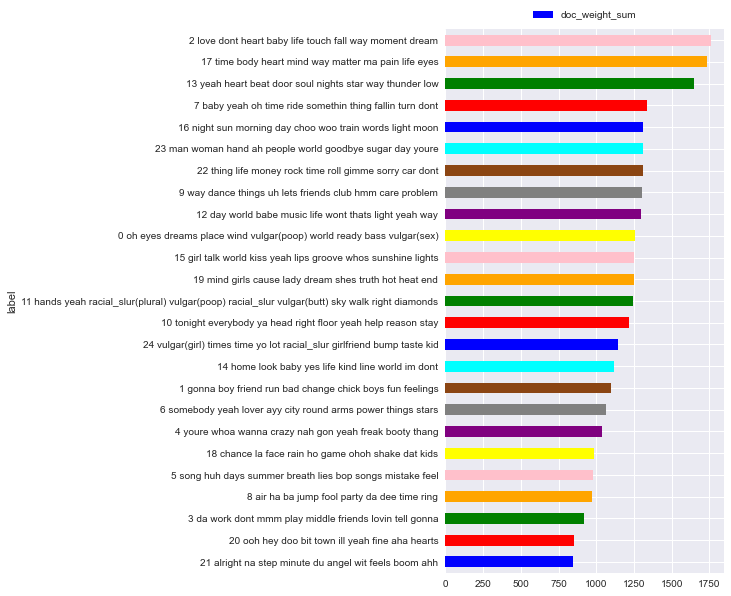

In [26]:
## Convert TOKENs to table of verses
## Scikit Learn wants an F1 style corpus. 
## Create one from annotated TOKEN table, 
## keeping only regular nouns.

VERS = metaTok[metaTok.pos.str.match(r'^NNS?$')]\
    .groupby(OHCO2[:7]).term_str\
    .apply(lambda x: ' '.join(x))\
    .to_frame()\
    .rename(columns={'term_str':'verse_str'})

## Create Vector Space
## Set Configs
n_terms = 5000
n_topics = 25
max_iter = 5

tfv = CountVectorizer(max_features=n_terms, stop_words='english')
tf = tfv.fit_transform(VERS.verse_str)
TERMS = tfv.get_feature_names()

## Generate Model by running Scikit Learn's LDA 
## algorithm and extract the THETA and PHI tables.
lda = LDA(n_components=n_topics, max_iter=max_iter, learning_offset=50., random_state=0)

## Extract THETA table
THETA = pd.DataFrame(lda.fit_transform(tf), index=VERS.index)
THETA.columns.name = 'topic_id'

## Extract PHI table
PHI = pd.DataFrame(lda.components_, columns=TERMS)
PHI.index.name = 'topic_id'
PHI.columns.name  = 'term_str'

## Get Top Terms Per Topic
TOPICS = PHI.stack().to_frame().rename(columns={0:'weight'})\
    .groupby('topic_id')\
    .apply(lambda x: 
           x.weight.sort_values(ascending=False)\
               .head(10)\
               .reset_index()\
               .drop('topic_id',1)\
               .term_str)

## Replacing certain curse words & ethnic slurs
## with pseudo words for presentation
TOPICS = TOPICS.replace("bitch", "vulgar(girl)")
TOPICS = TOPICS.replace("bitches", "vulgar(girls)")
TOPICS = TOPICS.replace("ass", "vulgar(butt)")
TOPICS = TOPICS.replace("shit", "vulgar(poop)")
TOPICS = TOPICS.replace("fuck", "vulgar(sex)")
TOPICS = TOPICS.replace("nigga", "racial_slur")
TOPICS = TOPICS.replace("niggas", "racial_slur(plural)")

## Sort Topics by DOC weight & Visualize
TOPICS['label'] = TOPICS.apply(lambda x: str(x.name) + ' ' + ' '.join(x), 1)
TOPICS['doc_weight_sum'] = THETA.sum()
colors = ['blue', 'red', 'green', 'orange', 'pink', 'yellow', 'purple', 'grey', 'saddlebrown', 'cyan']
TOPICS.sort_values('doc_weight_sum', ascending=True).plot.barh(y='doc_weight_sum', x='label', figsize=(5,10), color=colors)
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.05));

In [27]:
topic_cols = [t for t in range(n_topics)]
DECADES = THETA.groupby('decade')[topic_cols].mean().T                                            
DECADES.index.name = 'topic_id'
DECADES['topterms'] = TOPICS[[i for i in range(10)]].apply(lambda x: ' '.join(x), 1)
display(DECADES.sort_values('2010s', ascending=False).style.background_gradient());

decade,1970s,1980s,1990s,2000s,2010s,topterms
topic_id,,,,,,
13,0.050713,0.057716,0.055577,0.049146,0.059415,yeah heart beat door soul nights star way thunder low
11,0.029538,0.023304,0.038641,0.048835,0.055766,hands yeah racial_slur(plural) vulgar(poop) racial_slur vulgar(butt) sky walk right diamonds
24,0.024326,0.024512,0.032970,0.043120,0.055312,vulgar(girl) times time yo lot racial_slur girlfriend bump taste kid
17,0.045946,0.072068,0.066258,0.051791,0.050065,time body heart mind way matter ma pain life eyes
0,0.038945,0.045711,0.037349,0.038858,0.046812,oh eyes dreams place wind vulgar(poop) world ready bass vulgar(sex)
22,0.049058,0.037905,0.035136,0.048028,0.046251,thing life money rock time roll gimme sorry car dont
10,0.037228,0.036897,0.033816,0.045677,0.044649,tonight everybody ya head right floor yeah help reason stay
7,0.040704,0.041408,0.053515,0.040695,0.043300,baby yeah oh time ride somethin thing fallin turn dont
9,0.043582,0.037907,0.040091,0.050537,0.041456,way dance things uh lets friends club hmm care problem


In [28]:
fig = px.scatter(DECADES.reset_index(), '1970s', '2010s',hover_name='topterms',text='topic_id',title="Topics by Decade")\
    .update_traces(mode='text')
fig.add_annotation(x=DECADES.loc[24][0], y=DECADES.loc[24][4],text=DECADES.loc[24][5],showarrow=False,xshift=150,yshift=-15)
fig.add_annotation(x=DECADES.loc[11][0], y=DECADES.loc[11][4],text=DECADES.loc[11][5],showarrow=False,xshift=100,yshift=15)
fig.add_annotation(x=DECADES.loc[2][0], y=DECADES.loc[2][4],text=DECADES.loc[2][5],showarrow=False,yshift=-10,xshift=-130)
fig.add_annotation(x=DECADES.loc[23][0], y=DECADES.loc[23][4],text=DECADES.loc[23][5],showarrow=False,yshift=-10)
fig.show()

### Cluster Topics

In [7]:
## Define Tree Plotting/Dendogram Function
def plot_tree(tree, labels, thresh=None):
    plt.figure()
    fig, axes = plt.subplots(figsize=(4, 10))
    dendrogram = sch.dendrogram(tree, 
                                labels=labels, 
                                color_threshold=thresh,
                                above_threshold_color='0.5',
                                orientation="left")
    plt.tick_params(axis='both', which='major', labelsize=14)

<Figure size 432x288 with 0 Axes>

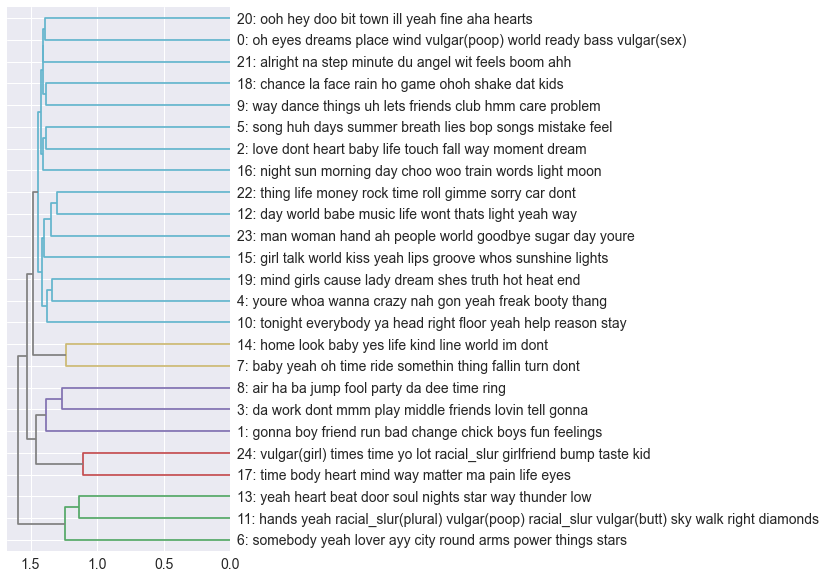

In [8]:
SIMS = pdist(normalize(PHI), metric='euclidean')
TREE = sch.linkage(SIMS, method='ward')
labels  = ["{}: {}".format(a,b) for a, b in zip(DECADES.index,  DECADES.topterms.tolist())]
plot_tree(TREE, labels, 1.45);

## Word Choice by Decade

In [9]:
def plot_wordcloud(df,row,col,pos_filter=None,pos_list=None):
    wc = WordCloud(background_color="white",colormap="Dark2",max_font_size=100,random_state=15)

    fig = plt.figure(figsize=(20,7))
    
    df = df.reset_index()
    df = df.groupby(['decade', "term_str"]).size().unstack()
    df = df.fillna(0).T.reset_index()
    df = pd.merge(df, VOCAB[["term_str", "stop", "pos_max"]], on="term_str", how="left")
    ## Removing Stopwords
    df = df[df.stop != 1]
    if pos_filter == "on":
        df = df[df.pos_max.isin(pos_list)]
    elif pos_filter == "out":
        df = df[~df.pos_max.isin(pos_list)] 
    del df['stop']
    del df['pos_max']
    
    for index, value in enumerate(df.columns[1:]):

        top_dict = dict(zip(df['term_str'].tolist(),df[value].tolist()))
        wc.generate_from_frequencies(top_dict)
        plt.subplot(row,col,index+1)
        plt.imshow(wc,interpolation="bilinear")
        plt.axis("off")
        plt.title(f"{value}",fontsize=15) 

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()

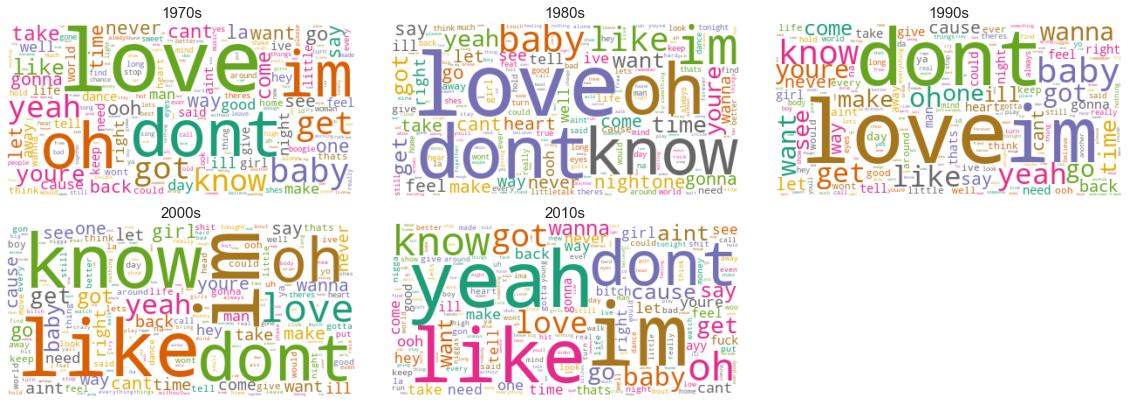

In [10]:
plot_wordcloud(metaTok,2,3,"out",['PRP', "PRP$", "WP", "WP$"])

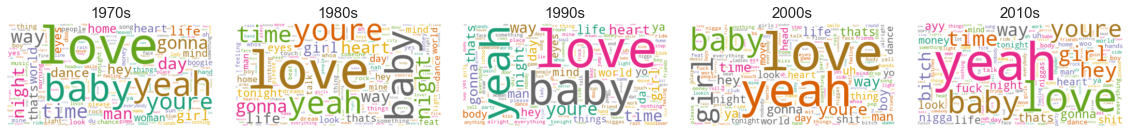

In [11]:
plot_wordcloud(metaTok,1,5,"on",['NN', "NNS"])

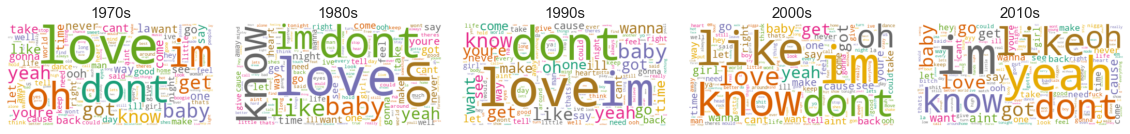

In [12]:
plot_wordcloud(metaTok,1,5)

In [13]:
def plot_words_freq(df,word_list):

    plt.figure(figsize=(15,8))
    
    df = metaTok2.reset_index()
    df = df.groupby(['decade', "term_str"]).size().unstack()
    df = df.fillna(0).T.reset_index()
    df = pd.merge(df, VOCAB2[["term_str"]], on="term_str", how="left").T
    df.columns = df.iloc[0]
    df = df[1:]
    
    plt.plot(df[word_list])

    plt.title("Word Frequency in Popular Music Across the Decades",fontsize=14)
    plt.xlabel("Decade", fontsize=14)
    plt.ylabel("Frequency in Top 100 Billboard Hit Songs",fontsize=14)
    plt.xticks(fontsize=12,rotation=20)
    plt.yticks(fontsize=12)
    plt.legend(df[word_list])
    plt.show()

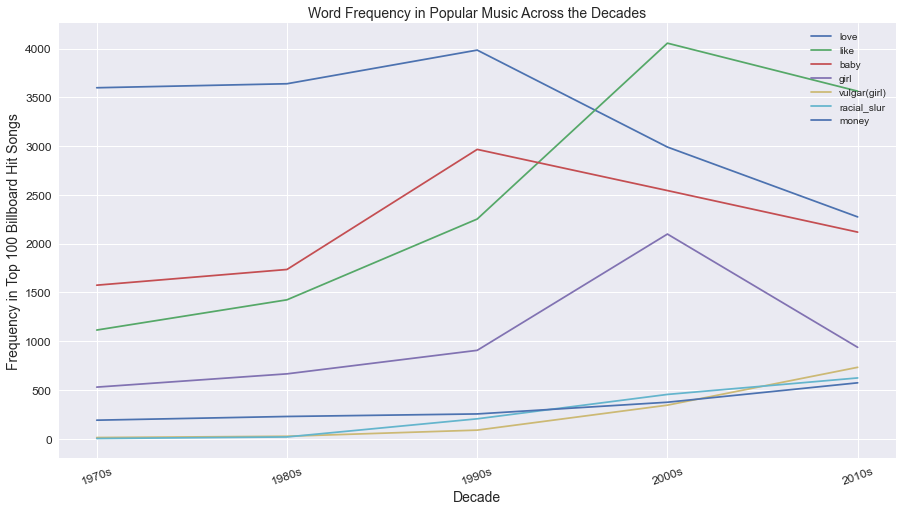

In [14]:
metaTok2 = metaTok.copy()
VOCAB2 = VOCAB.copy()
metaTok2['term_str'] = metaTok2['term_str'].replace("bitch", "vulgar(girl)")
metaTok2['term_str'] = metaTok2['term_str'].replace("nigga", "racial_slur")
VOCAB2['term_str'] = VOCAB2['term_str'].replace("bitch", "vulgar(girl)")
VOCAB2['term_str'] = VOCAB2['term_str'].replace("nigga", "racial_slur")
plot_words_freq(metaTok2, ['love', 'like', 'baby', 'girl', 'vulgar(girl)', 'racial_slur', 'money']);

## Sentiment By Decade

In [15]:
salex = pd.read_csv('salex_nrc.csv').set_index('term_str')
salex.columns = [col.replace('nrc_','') for col in salex.columns]
emo = 'polarity'
salex['polarity'] = salex.positive - salex.negative
emo_cols = "anger anticipation disgust fear joy sadness surprise trust polarity".split()

In [16]:
senti = metaTok.reset_index().set_index(OHCO2[:8])
senti = senti.droplevel([2,3,5])
senti = senti.join(salex, on='term_str', how='left')
senti.drop(['negative', 'positive'], inplace=True, axis=1)
senti[emo_cols] = senti[emo_cols].fillna(0)

In [17]:
_70s = senti.loc["1970s"].copy()
_80s = senti.loc["1980s"].copy()
_90s = senti.loc["1990s"].copy()
_00s = senti.loc["2000s"].copy()
_10s = senti.loc["2010s"].copy()

### Distribution of Mean Sentiment Value by Decade

#### Utilizing Salex NRC

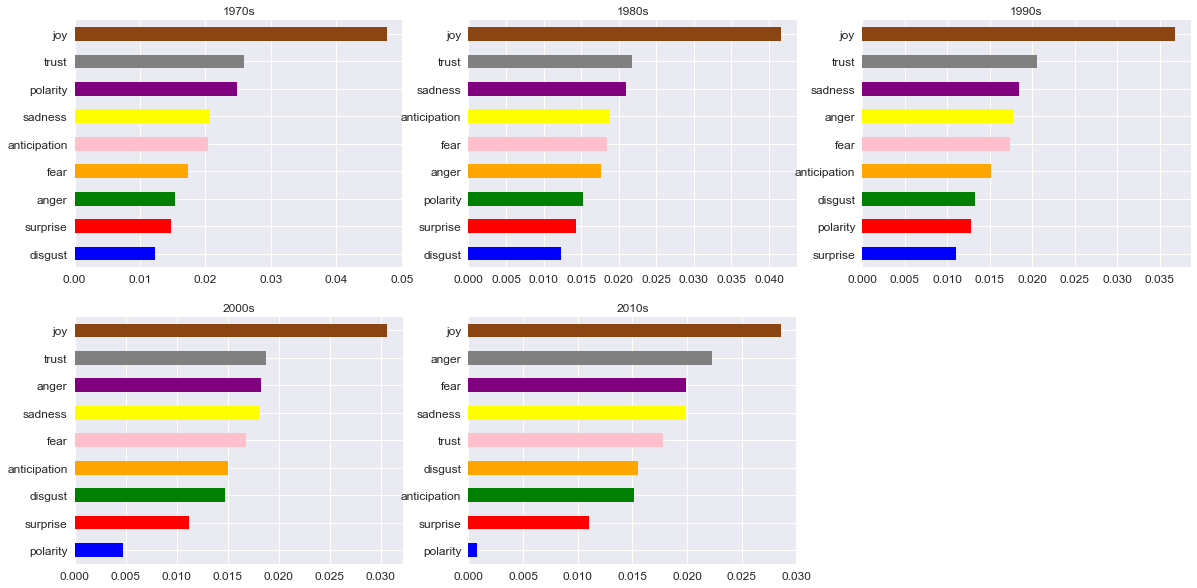

In [18]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)

_70s[emo_cols].mean().sort_values().plot(kind='barh', color=colors, title="1970s", ax=ax1, fontsize=12)
_80s[emo_cols].mean().sort_values().plot(kind='barh', color=colors, title="1980s", ax=ax2, fontsize=12)
_90s[emo_cols].mean().sort_values().plot(kind='barh', color=colors, title="1990s", ax=ax3, fontsize=12)
_00s[emo_cols].mean().sort_values().plot(kind='barh', color=colors, title="2000s", ax=ax4, fontsize=12)
_10s[emo_cols].mean().sort_values().plot(kind='barh', color=colors, title="2010s", ax=ax5, fontsize=12);

In [19]:
senti_decs = senti.groupby(OHCO2[1:2])[emo_cols].mean()

In [20]:
## Define Sentiment by Decade Plotting Function
def plot_sentiments(df, emo='polarity', tit=None):
    FIG = dict(figsize=(20, 7), legend=True, fontsize=14, rot=45)
    df[emo].plot(**FIG, title=tit)

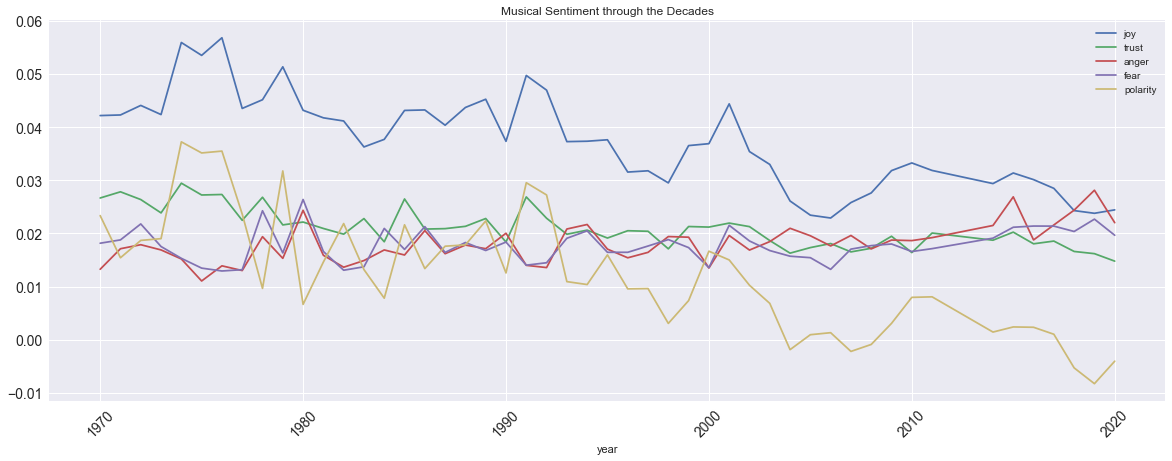

In [21]:
plot_sentiments(senti_decs, ['joy','trust','anger','fear','polarity'], 'Musical Sentiment through the Decades')

#### VADER

In [22]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [23]:
OHCO3 = ['decade', 'year', 'title', 'verse_num', 'line_num', 'token_num']
senti_lines = senti.groupby(OHCO3[:5])[emo_cols].mean()
senti_lines['sent_str'] = senti.groupby(OHCO3[:5]).term_str.apply(lambda x: x.str.cat(sep=' '))
vader_cols = senti_lines.sent_str.apply(analyser.polarity_scores).apply(lambda x: pd.Series(x))
vader = pd.concat([senti_lines, vader_cols], axis=1)
vader_avg = vader.groupby(['decade', 'year']).mean()

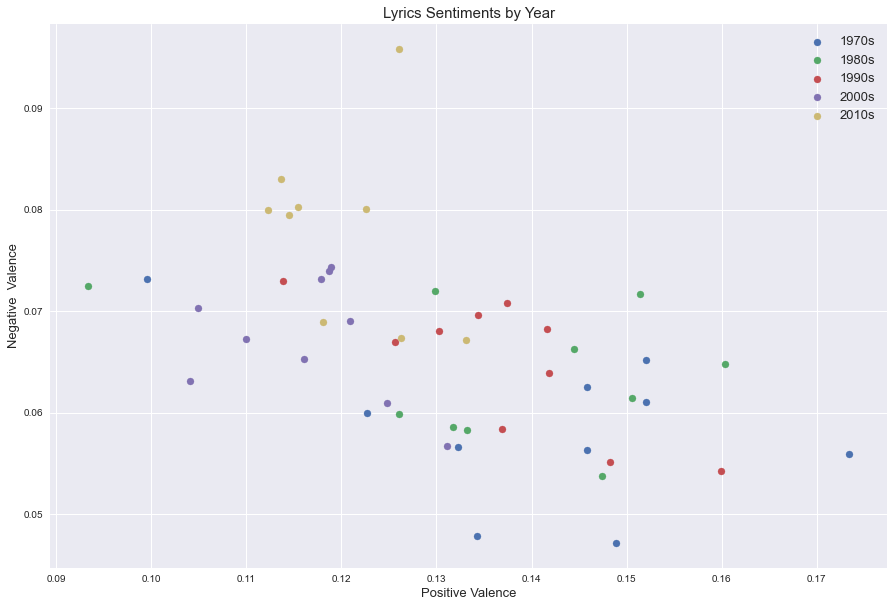

In [24]:
df = vader_avg.reset_index()
plt.figure(figsize=(15, 10))
for name, group in df.groupby('decade'):
    plt.scatter(group['pos'],group['neg'],label=name)
    plt.legend(fontsize=13)
plt.title("Lyrics Sentiments by Year", fontsize=15)
plt.xlabel('Positive Valence', fontsize=13)
plt.ylabel('Negative  Valence', fontsize=13)
plt.show()

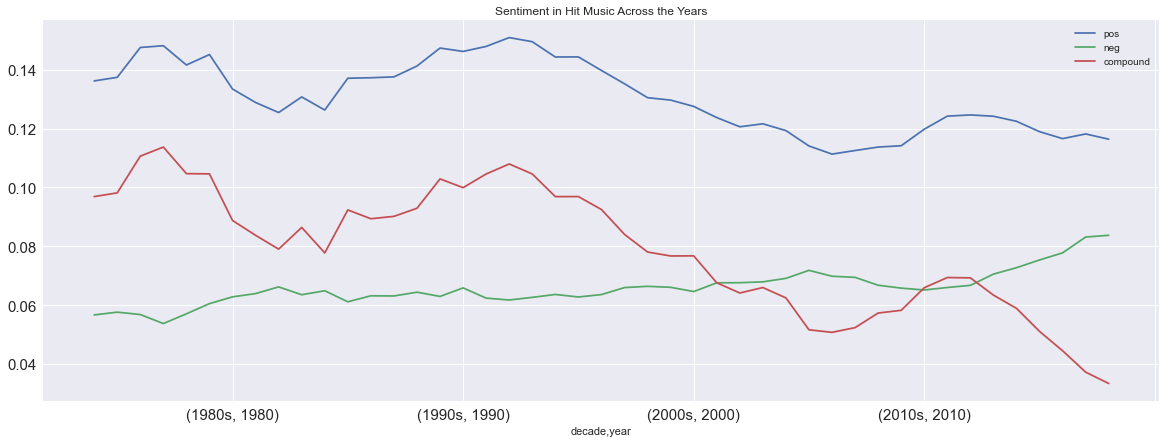

In [25]:
w = 5
vader_avg[['pos', 'neg', 'compound']].rolling(w)\
    .mean().plot(figsize=(20,7),title="Sentiment in Hit Music Across the Years", fontsize=15);